# 220968280 - Anirudh Swaminathan - DSE A2

## Week 7 - Exercise 2 - Naive Bayes Classifier on NB2.csv

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

### 2. Import dataset(adult.csv)

In [2]:
df = pd.read_csv('NB2.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 3. Exploratory data analysis 

In [3]:
df.shape

(9578, 14)

In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [7]:
df[categorical].isnull().sum()

purpose    0
dtype: int64

In [8]:
for var in categorical: 
    print(df[var].value_counts())

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [9]:
for var in categorical: 
    print(df[var].value_counts()/float(len(df)))

purpose
debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: count, dtype: float64


In [10]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print(f'There are {len(numerical)} numerical variables\n')


There are 13 numerical variables



In [11]:
df[numerical].head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
df[numerical].isnull().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### 4. Declare feature vector and target variable 

In [13]:
X = df.drop(['not.fully.paid'], axis=1)
y = df['not.fully.paid']

### 5. Split data into separate training and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 6. print the percentage of missing values in the categorical variables in the training set


In [15]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_train[categorical].isnull().sum()

purpose    0
dtype: int64

### 9. Encode categorical variables

In [16]:
encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

### 10. Feature Scaling

In [17]:
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 11. Model training

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### 12. Predict the results

In [19]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### 13. Check the accuracy score 

In [20]:
print(f'test accuracy:{accuracy_score(y_test,y_pred)}')

test accuracy:0.7696590118302018


### 14. Compare the train-set and test-set accuracy

In [21]:
y_pred2 = gnb.predict(X_train)
y_pred2
print(f'train accuracy:{accuracy_score(y_train,y_pred2)}')

train accuracy:0.776700477326969


### 15. Visualize confusion matrix with seaborn heatmap

<Axes: >

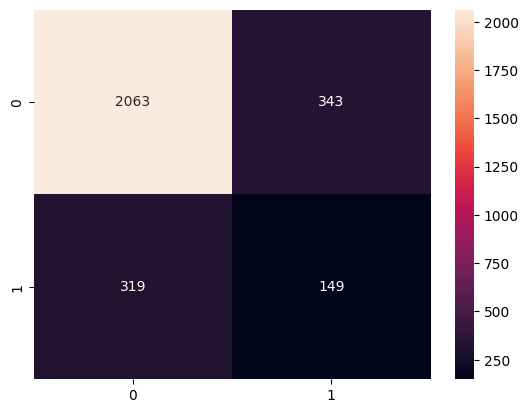

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### 16. Generate Classification Report

In [23]:
print(f'classification report: \n{classification_report(y_test, y_pred)}\n')

classification report: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2406
           1       0.30      0.32      0.31       468

    accuracy                           0.77      2874
   macro avg       0.58      0.59      0.59      2874
weighted avg       0.77      0.77      0.77      2874




### 17. Evaluate Classification accuracy
### 18. Evaluate Classification error

In [24]:
print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
print(f'classification error: {1-accuracy_score(y_test, y_pred)}')

classification accuracy: 0.7696590118302018
classification error: 0.2303409881697982


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [25]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['0', '1'])
y_pred_prob_df

,0,1
0,0.941337,0.058663
1,0.972521,0.027479
2,0.938162,0.061838
3,0.686460,0.313540
4,0.047414,0.952586
5,0.961251,0.038749
6,0.990169,0.009831
7,0.086985,0.913015
8,0.316926,0.683074
9,0.996547,0.003453


### 20. Plot histogram of predicted probabilities

Text(0.5, 1.0, 'histogram of predicted probabilities')

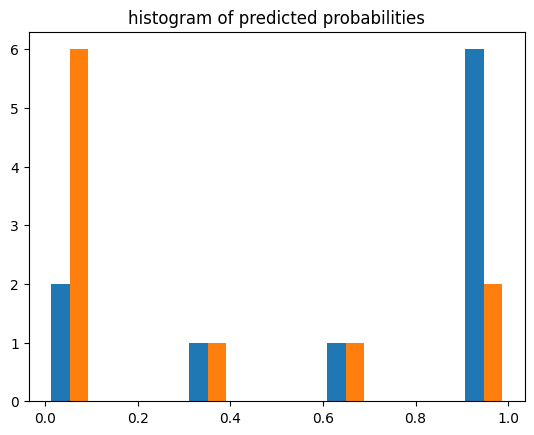

In [26]:
plt.hist(y_pred_prob_df)
plt.title('histogram of predicted probabilities')

### 21. Plot ROC Curve

c:\Users\s_ani\Documents\textbooks\4thSem\ML_LAB\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


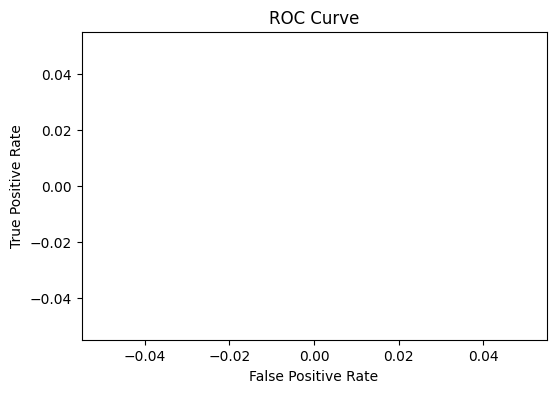

In [27]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '0')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 22. Compute ROC AUC

In [28]:
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6678


### 23. Calculate cross-validated ROC AUC

In [29]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6569


### 24. Applying 10-Fold Cross Validation

In [30]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
scores

array([0.77645306, 0.76453055, 0.7704918 , 0.77496274, 0.77761194,
       0.78656716, 0.78507463, 0.75522388, 0.75522388, 0.78358209])

### 25. Compute the Average cross-validation score

In [31]:
print(f'average cross-validation score:{scores.mean()}')

average cross-validation score:0.7729721734101475
